# Импорт библиотек

In [3]:
import pandas as pd

# Импорт данных

Используя функцию из прошлого модуля, берем данные из файла profiles.csv

In [113]:
df = pd.read_csv('profiles.csv')
df['date'] = pd.to_datetime(df['date'])
df['Session Start'] = pd.to_datetime(df['Session Start'])
df['Session End'] = pd.to_datetime(df['Session End'])
df.head()

,User Id,Session Start,Session End,Device,Region,Channel,date,mean,Revenue
0,382394863972,2022-05-01 00:00:41,2022-05-01 01:13:45,Mac,Russia,MediaTornado,2022-05-01,30.482,0.0
1,428935481941,2022-05-01 00:01:35,2022-05-01 02:30:30,PC,Turkey,AdNonSense,2022-05-01,30.482,0.0
2,86266511938,2022-05-01 00:02:38,2022-05-01 01:22:33,Android,China,organic,2022-05-01,30.482,0.0
3,763000657462,2022-05-01 00:04:21,2022-05-01 00:24:15,PC,Turkey,organic,2022-05-01,30.482,0.0
4,791058813280,2022-05-01 00:05:17,2022-05-01 01:14:51,Android,Thailand,LeapBob,2022-05-01,30.482,0.0


# Исследовательский анализ данных

## DAU

DAU (Daily Active Users) — это количество уникальных пользователей, которые взаимодействовали с приложением в течение одного дня.

In [12]:
# Рассчитываем DAU (ежедневная активность пользователей)
dau = df.groupby('date')['User Id'].nunique()  # Количество уникальных пользователей по дате
print("DAU:")
print(dau)

DAU:
date
2022-05-01     909
2022-05-02     758
2022-05-03     849
2022-05-04    1015
2022-05-05     970
              ... 
2022-10-23     739
2022-10-24     940
2022-10-25    1021
2022-10-26    1045
2022-10-27    1087
Name: User Id, Length: 180, dtype: int64


# WAU

WAU (Weekly Active Users) — количество уникальных пользователей, которые взаимодействовали с приложением в течение недели.

In [13]:
# Сначала создаём столбец с номером недели
df['week'] = df['date'].dt.isocalendar().week

wau = df.groupby('week')['User Id'].nunique()  # Количество уникальных пользователей за неделю
print("\nWAU:")
print(wau)


WAU:
week
17     909
18    6276
19    6191
20    6148
21    6017
22    5400
23    4443
24    4481
25    6264
26    6939
27    5746
28    4330
29    4283
30    5434
31    5958
32    5777
33    6124
34    6186
35    5560
36    4841
37    5308
38    7263
39    7948
40    6841
41    5428
42    5820
43    4093
Name: User Id, dtype: int64


# MAU

MAU (Monthly Active Users) — количество уникальных пользователей, которые взаимодействовали с приложением в течение месяца.

In [14]:
df['month'] = df['date'].dt.month

mau = df.groupby('month')['User Id'].nunique()  # Количество уникальных пользователей за месяц
print("\nMAU:")
print(mau)


MAU:
month
5     27111
6     23123
7     22627
8     26586
9     26327
10    24234
Name: User Id, dtype: int64


## Количество времени, проведенное в приложении 

In [27]:
((df['Session End'] - df['Session Start']).dt.total_seconds().sum()) // 3600

75082.0

## Распределение привлеченных пользователей

#### Распределение по устройству

In [31]:
df.value_counts('Device')

Device
iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: count, dtype: int64

#### Распределение по стране

In [36]:
df.value_counts('Region')

Region
Russia      100002
Turkey       17575
Thailand     17450
China        14981
Name: count, dtype: int64

#### Распределение по каналу привлечения

In [35]:
df.value_counts('Channel')

Channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: count, dtype: int64

### Весь дашборд доступен в файле Dashboard.py

#

# 2.3 Создание профилей пользователей

### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей

Region
Russia      1.341884
Turkey      1.212648
China       1.206780
Thailand    1.099516
Name: Revenue, dtype: float64

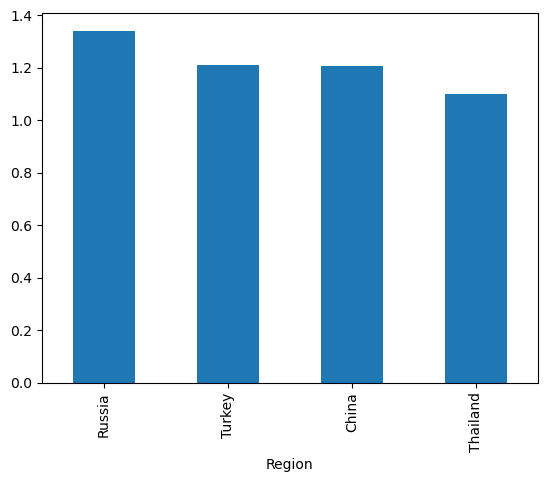

In [53]:
result = df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
result.plot(kind='bar')
result

#### В России и Турции самые платящие пользователи.

### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

Device
Android    1.381604
iPhone     1.319395
PC         1.307851
Mac        1.281804
Name: Revenue, dtype: float64

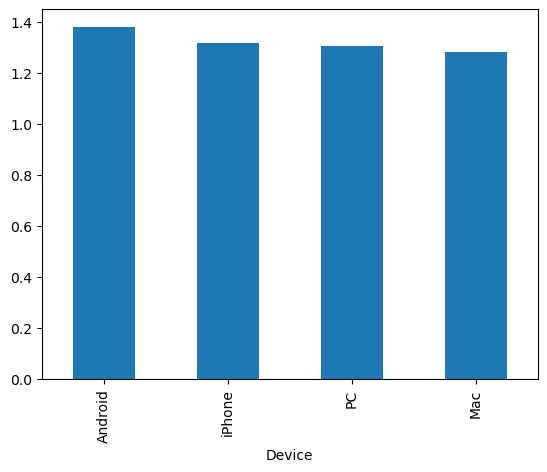

In [49]:
result = df[df['Region'].isin(['Russia', 'Turkey'])].groupby('Device')['Revenue'].mean().sort_values(ascending=False)
result.plot(kind='bar')
result

#### Из данных видно, что платящие пользователи из стран России и Турции чаще всего пользуются Android, хотя и с незначительным отрывом.

### По каким рекламный каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Channel
lambdaMediaAds        3.636268
TipTop                3.197671
RocketSuperAds        2.333453
WahooNetBanner        2.102649
YRabbit               1.292632
MediaTornado          1.162885
LeapBob               0.990649
OppleCreativeMedia    0.861145
AdNonSense            0.838526
FaceBoom              0.775792
organic               0.737904
Name: Revenue, dtype: float64

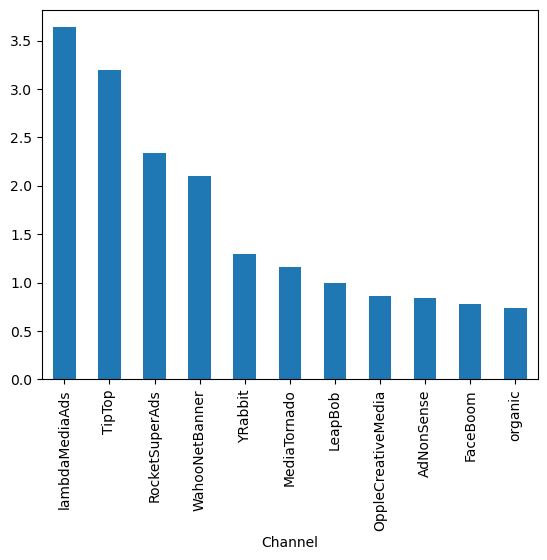

In [50]:
result = df.groupby('Channel')['Revenue'].mean().sort_values(ascending=False)
result.plot(kind='bar')
result

#### Очевидным лидером среди каналов является lambdaMediaAds, дальше идут TipTop и RocketSuperAds.

#

# 2.4 Маркетинговый анализ

### Для проведения маркетиногового анализа необходимо рассчитать сколько денег потратили на привлечение:

### Сколько денег потратили всего:

In [90]:
df.drop_duplicates(subset='mean')['mean'].sum()

10549.73

### Сколько денег потратили на каждый источник:

In [91]:
df.drop_duplicates(subset='mean').groupby('Channel')['mean'].sum().sort_values(ascending=False).round()

Channel
organic               3882.0
FaceBoom              2273.0
TipTop                 846.0
LeapBob                788.0
OppleCreativeMedia     722.0
WahooNetBanner         495.0
AdNonSense             440.0
RocketSuperAds         402.0
MediaTornado           324.0
YRabbit                279.0
lambdaMediaAds         101.0
Name: mean, dtype: float64

### На канал organic потратили больше всего денег

### Сколько денег потратили по времени:

date
2022-05-01    30.4820
2022-05-02    23.0845
2022-05-03    26.3070
2022-05-04    33.7000
2022-05-05    31.9905
               ...   
2022-10-23    59.2995
2022-10-24    73.7590
2022-10-25    86.2600
2022-10-26    95.2370
2022-10-27    96.7165
Name: mean, Length: 180, dtype: float64

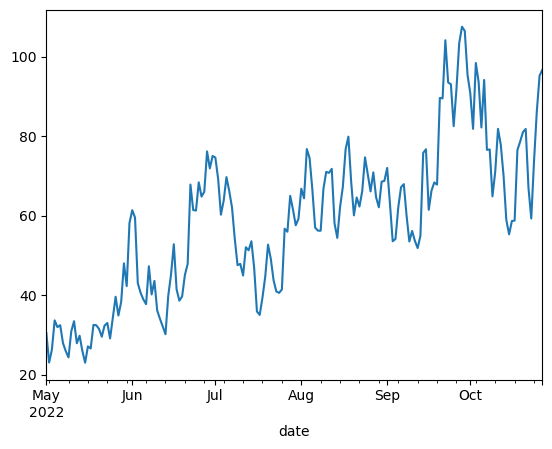

In [92]:
result = df.drop_duplicates(subset='mean').groupby('date')['mean'].sum()
result.plot()
result

### Виден тренд - траты растут с каждым днем

### Сколько в среднем стоило привлечение одного покупателя из каждого источника:

In [93]:
df.drop_duplicates(subset='mean').groupby('Channel')['mean'].mean().sort_values(ascending=False).round()

Channel
YRabbit               70.0
LeapBob               66.0
FaceBoom              63.0
WahooNetBanner        62.0
organic               58.0
RocketSuperAds        57.0
OppleCreativeMedia    56.0
AdNonSense            55.0
TipTop                53.0
lambdaMediaAds        50.0
MediaTornado          46.0
Name: mean, dtype: float64

###

## Оценим окупаемость рекламы для привлечения пользователей

### Расчитаем параметр - окупаемость

### Так как для создания профиля в Модуле 1 мы добавляли колонку "траты на привлечение" (Revenue), которая считается за день, то окупаемость тоже будем считать за день

In [115]:
# Добавляем колонку доход за день
revenue_day = df.groupby(['date'])['Revenue'].sum().reset_index().rename(columns={'Revenue': 'revenue_day'})
df = df.merge(revenue_day, on='date', how='left')

In [118]:
# Добавляем колонку окупаемость в день
f['payback'] = df['revenue_day'] - df['mean']

### Общая окупаемость рекламы:

In [124]:
df.drop_duplicates(subset='date')['payback'].sum().round()

182219.0

### Окупаемость реклами с разбивкой по устройствам:

In [127]:
df.drop_duplicates(subset='date').groupby('Device')['payback'].sum().sort_values(ascending=False)

Device
iPhone     62082.5615
Android    49916.9900
Mac        35751.4975
PC         34467.9110
Name: payback, dtype: float64

### пользователи с Iphone позволяют получить самую большую окупаемость

### Окупаемость реклами с разбивкой по странам:

In [128]:
df.drop_duplicates(subset='date').groupby('Region')['payback'].sum().sort_values(ascending=False)

Region
Russia      111533.6120
Turkey       25843.1845
Thailand     24322.2340
China        20519.9295
Name: payback, dtype: float64

### Реклама в России позвоялем получить самую большую окупаемость

### Окупаемость реклами с разбивкой по рекламным каналам:

In [129]:
df.drop_duplicates(subset='date').groupby('Channel')['payback'].sum().sort_values(ascending=False)

Channel
organic               64656.1250
FaceBoom              33330.6750
TipTop                16304.8385
OppleCreativeMedia    13060.1780
LeapBob               12675.3075
WahooNetBanner        11291.8720
AdNonSense             9365.7900
RocketSuperAds         8165.6775
MediaTornado           6352.8535
YRabbit                4785.9970
lambdaMediaAds         2229.6460
Name: payback, dtype: float64

### Канал organic позволяет получить самую большую окупаемость

### Окупаемость реклами с разбивкой по устройствам, странам, рекламным каналам:

In [131]:
df.drop_duplicates(subset='date').groupby(['Device', 'Region', 'Channel'])['payback'].sum().sort_values(ascending=False)

Device   Region    Channel           
Mac      Russia    organic               16373.7095
iPhone   Russia    organic               14104.9485
                   FaceBoom              13920.0110
Android  Russia    organic               11424.2830
                   FaceBoom               8992.6660
iPhone   Russia    TipTop                 8289.6960
                   RocketSuperAds         7006.0970
Mac      Russia    FaceBoom               5820.3490
PC       Turkey    LeapBob                5220.9380
         Russia    FaceBoom               4597.6490
Mac      Russia    TipTop                 4518.7035
Android  Thailand  WahooNetBanner         3736.1440
PC       China     organic                3498.2860
Android  China     organic                3311.3285
         Thailand  organic                3271.9685
iPhone   Russia    MediaTornado           3165.0285
PC       Turkey    OppleCreativeMedia     2960.0265
Android  Turkey    organic                2761.1060
iPhone   Russia    YRabbit

### Самая большая окупаемость у пользователей с Iphone из России с помощью канала organic

## Под каждой метрике дал интерпретацию полученным результатам

# 

# Отчет

В ходе Модуля 2, пришлось:
* Построил интерактивный дашборд
* Исследовал данные в информационной панели
* Определил метрики по профилю пользователя
* Провел маркетинговый ананлиз